# London Bike Sharing EDA & Data Visualization Project

Welcome to "Bike Demand Visualization Project". As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed at reducing traffic congestion, noise, and air pollution.

This project aims to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine-learning model.

# **Content**

1. [Features](#1.)
1. [Importing Libraries](#2.)
1. [Reading the Dataset](#3.)
1. [Feature Engineering](#4.)
1. [Distribution of various discrete features on (Season, holiday, weekend and weathercode)](#5.)
1. [Correlation of the Target Variable and the other Features](#6.)
1. [Bike Shares Over Time](#7.)
1. [Bike Shares Over Year, Season, Month and Day](#8.)
1. [Bike Shares by months and year of month](#9.)
1. [Bike Shares by hours on (holidays, weekend, season)](#10.)
1. [Bike Shares by day of week](#11.)
1. [Bike Shares by day of month](#12.)
1. [Bike Shares by Year](#13.)
1. [Distribution of Bike Shares by weekday/weekend](#14.)
1. [Distribution of Weather by Seasons](#15.)
1. [Conclusion](#16.)

<a id="1."></a> 
# Features
    
- **timestamp** = timestamp field for grouping the data
- **cnt** = the count of a new bike shares
- **t1** = real temperature in C
- **t2** = temperature in C “feels like”
- **hum** = humidity in percentage
- **wind_speed** = wind speed in km/h
- **weather_code** = category of the weather
- **is_holiday** = boolean field - 1 holiday / 0 non holiday
- **is_weekend** = boolean field - 1 if the day is weekend
- **season** = category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- **1** = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- **2** = scattered clouds / few clouds
- **3** = Broken clouds
- **4** = Cloudy
- **7** = Rain/ light Rain shower/ Light rain
- **10** = rain with thunderstorm
- **26** = snowfall
- **94** = Freezing Fog

<a id="2."></a> 
# Importing Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)
import warnings
warnings.filterwarnings("ignore")

<a id="3."></a> 
# Reading the Dataset

In [35]:
df = pd.read_csv("london_merged.csv")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


<a id="4."></a> 
# Feature Engineering

In [37]:
df.timestamp = pd.to_datetime(df.timestamp)

df.insert(1, 'date', df['timestamp'].dt.date)
df.insert(2,'year', df['timestamp'].dt.year)
df.insert(3, 'month', df['timestamp'].dt.month)
df.insert(4, 'day', df['timestamp'].dt.day)
df.insert(5, 'time', df['timestamp'].dt.time)

df.insert(14, "cnt", df.pop("cnt"))

In [38]:
df.set_index('timestamp', inplace=True)

In [39]:
df.head()

,date,year,month,day,time,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,cnt
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04,2015,1,4,00:00:00,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,182
2015-01-04 01:00:00,2015-01-04,2015,1,4,01:00:00,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,138
2015-01-04 02:00:00,2015-01-04,2015,1,4,02:00:00,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,134
2015-01-04 03:00:00,2015-01-04,2015,1,4,03:00:00,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,72
2015-01-04 04:00:00,2015-01-04,2015,1,4,04:00:00,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,47


<a id="5."></a> 
# Distribution of various discrete features on (Season, holiday, weekend and weathercode)

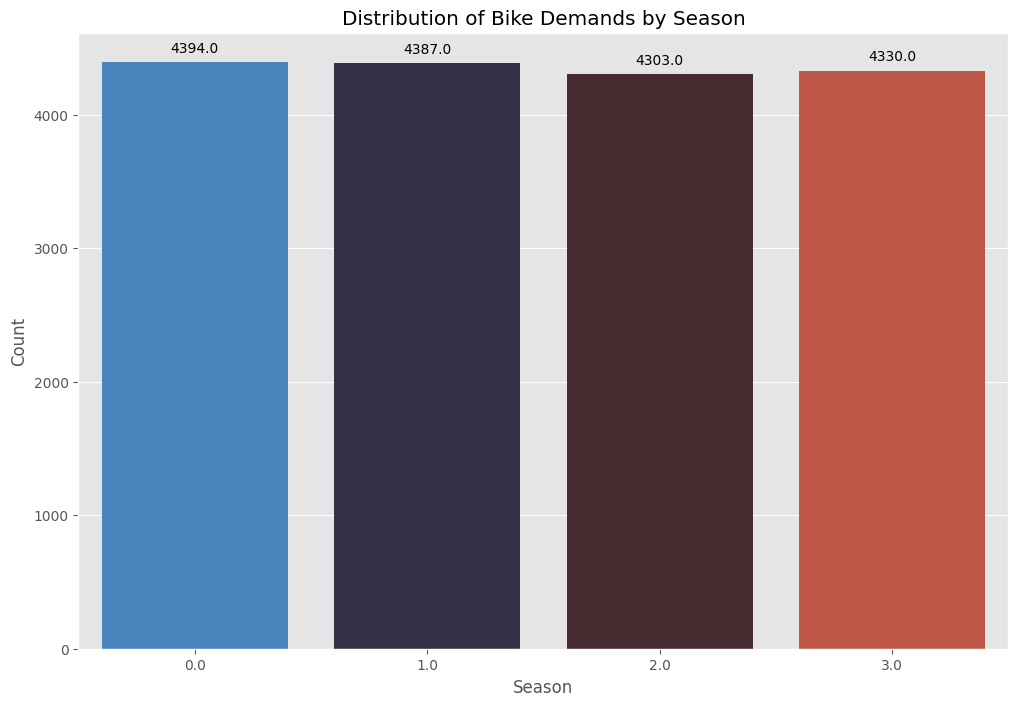

In [40]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = df.season, palette="icefire");
plt.title('Distribution of Bike Demands by Season')
plt.xlabel('Season')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

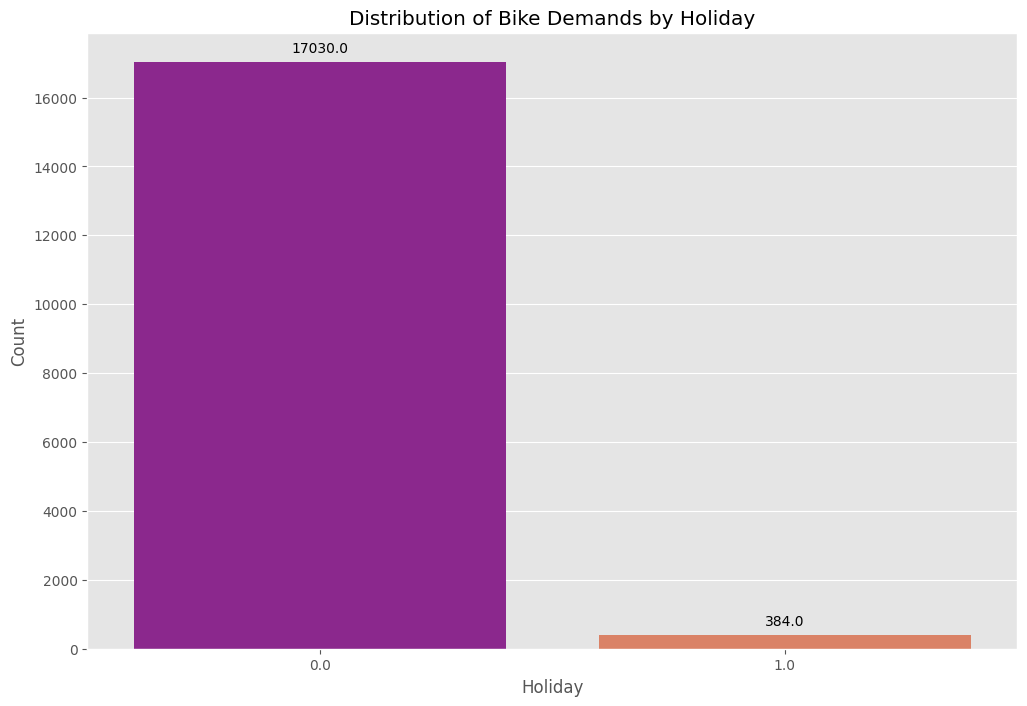

In [41]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = df.is_holiday, palette="plasma");
plt.title('Distribution of Bike Demands by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

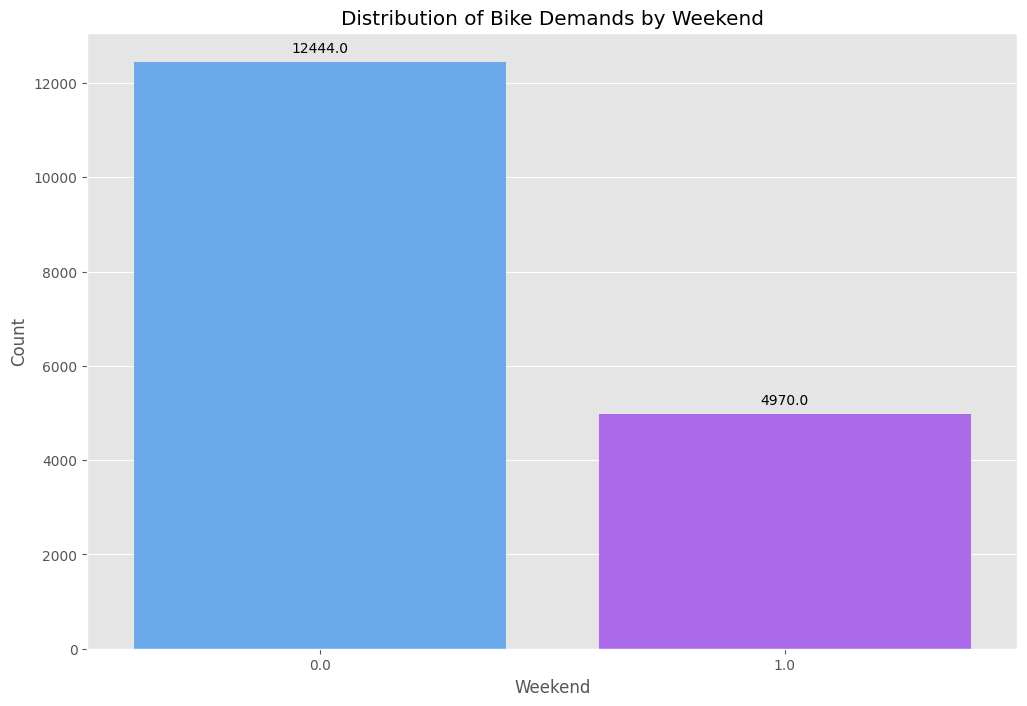

In [42]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = df.is_weekend, palette="cool");
plt.title('Distribution of Bike Demands by Weekend')
plt.xlabel('Weekend')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

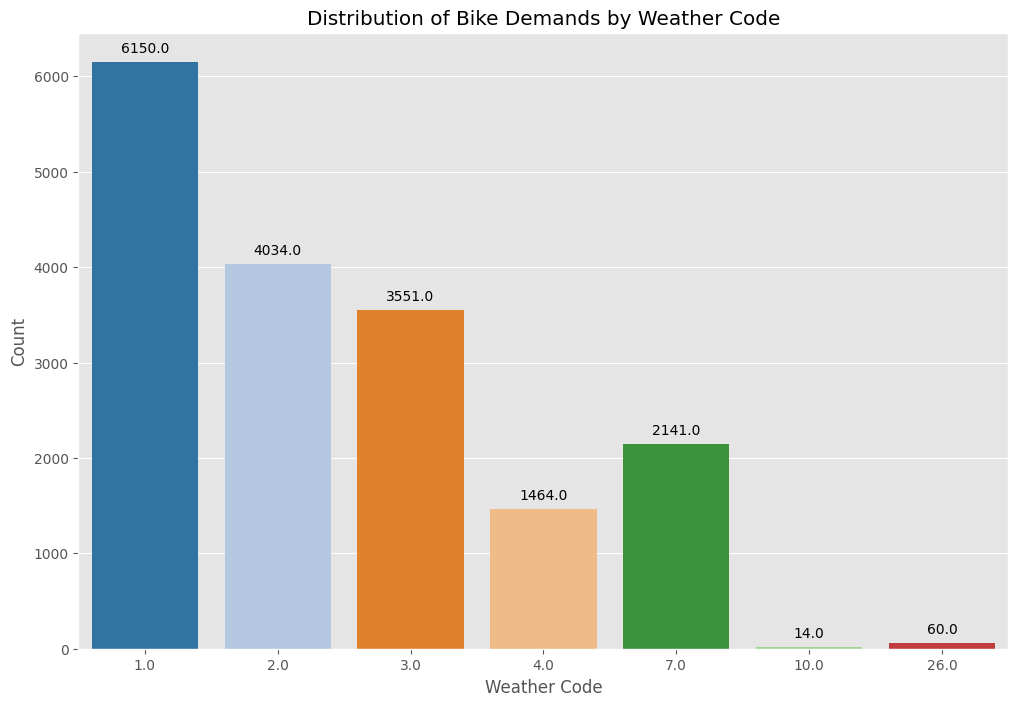

In [43]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = df.weather_code, palette="tab20");
plt.title('Distribution of Bike Demands by Weather Code')
plt.xlabel('Weather Code')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

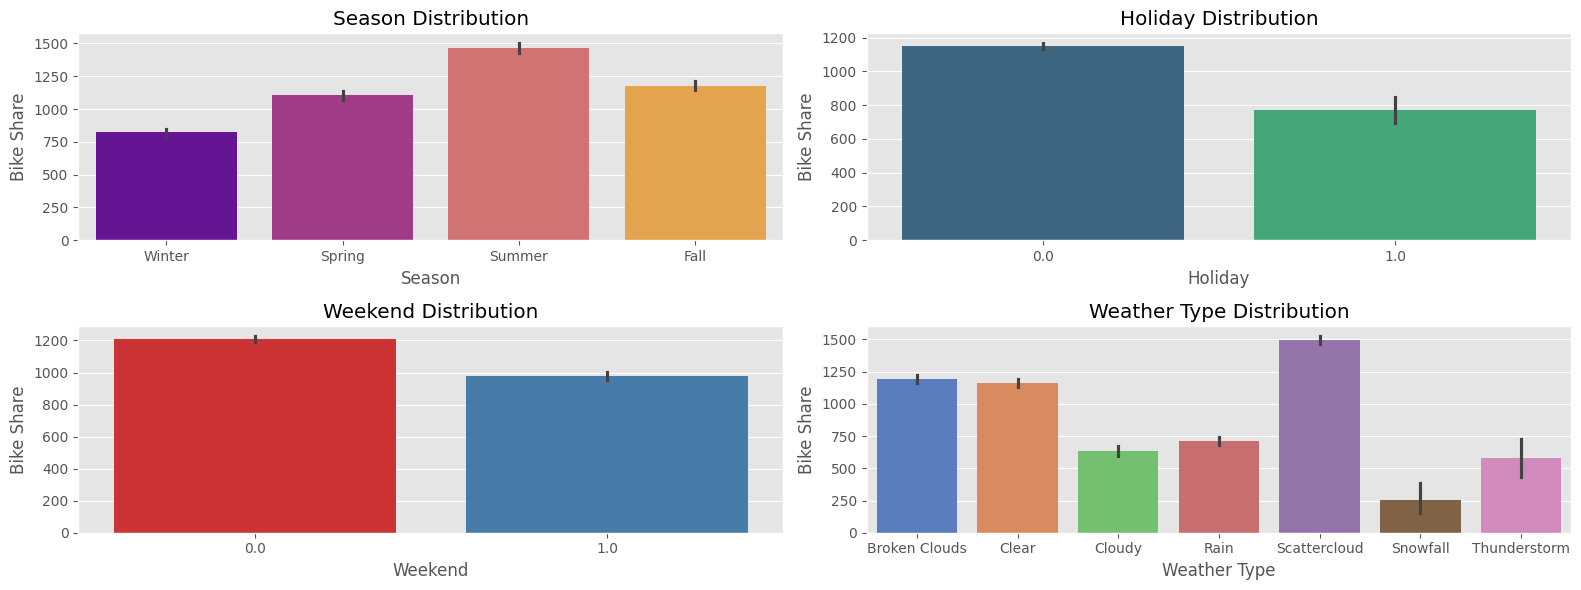

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 6))

season_mapping = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}

sns.barplot(x=df.season.map(season_mapping), y="cnt", data=df, ax=axes[0][0], palette="plasma")
axes[0][0].set_title('Season Distribution')
axes[0][0].set_xlabel('Season')
axes[0][0].set_ylabel('Bike Share')

sns.barplot(x='is_holiday', data=df, y="cnt", ax=axes[0][1], palette="viridis")
axes[0][1].set_title('Holiday Distribution')
axes[0][1].set_xlabel('Holiday')
axes[0][1].set_ylabel('Bike Share')

sns.barplot(x='is_weekend', data=df, y="cnt", ax=axes[1][0], palette="Set1")
axes[1][0].set_title('Weekend Distribution')
axes[1][0].set_xlabel('Weekend')
axes[1][0].set_ylabel('Bike Share')

weather_mapping = {1: 'Clear', 2: 'Scattercloud', 3: "Broken Clouds", 4: "Cloudy", 7: "Rain", 10: "Thunderstorm", 26: "Snowfall", 94: "Freezing Fog"}

sns.barplot(x=df['weather_code'].map(weather_mapping), y="cnt", data=df, ax=axes[1][1], palette="muted")
axes[1][1].set_title("Weather Type Distribution")
axes[1][1].set_xlabel('Weather Type')
axes[1][1].set_ylabel('Bike Share')

plt.tight_layout();
plt.show()

<a id="6."></a> 
# Correlation of the Target Variable and the other Features

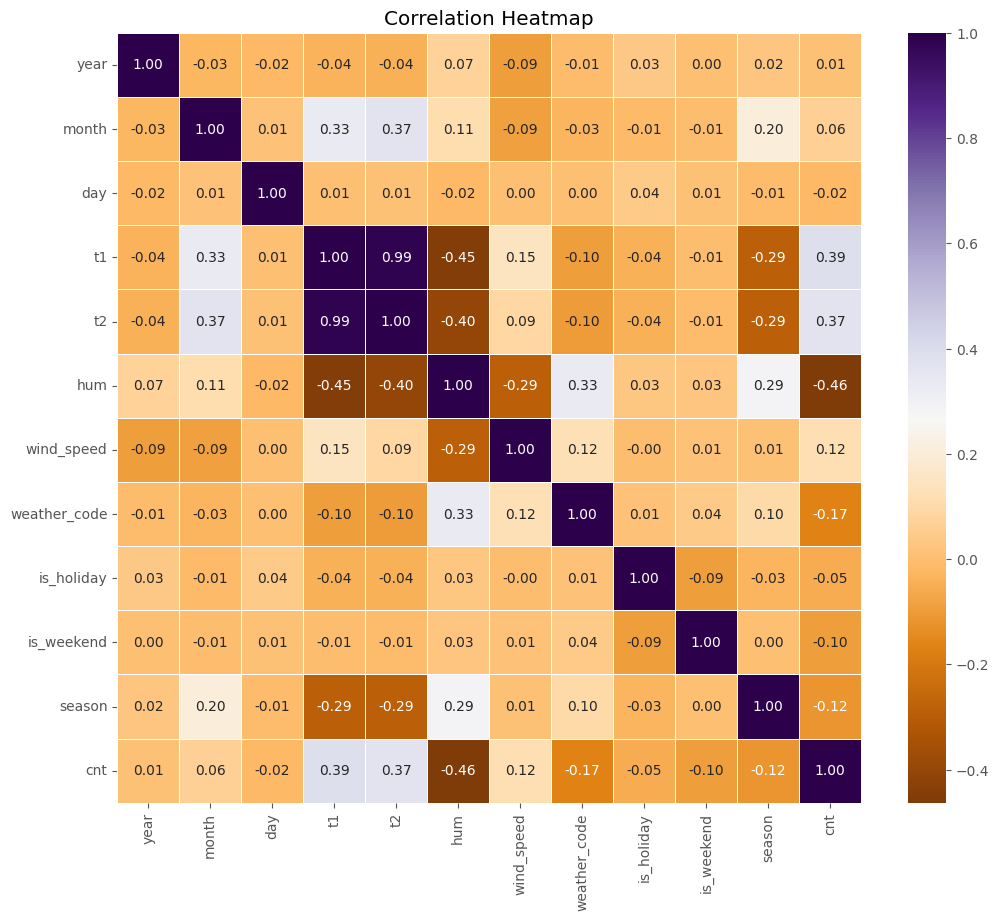

In [45]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes("number").corr(), annot=True, cmap='PuOr', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

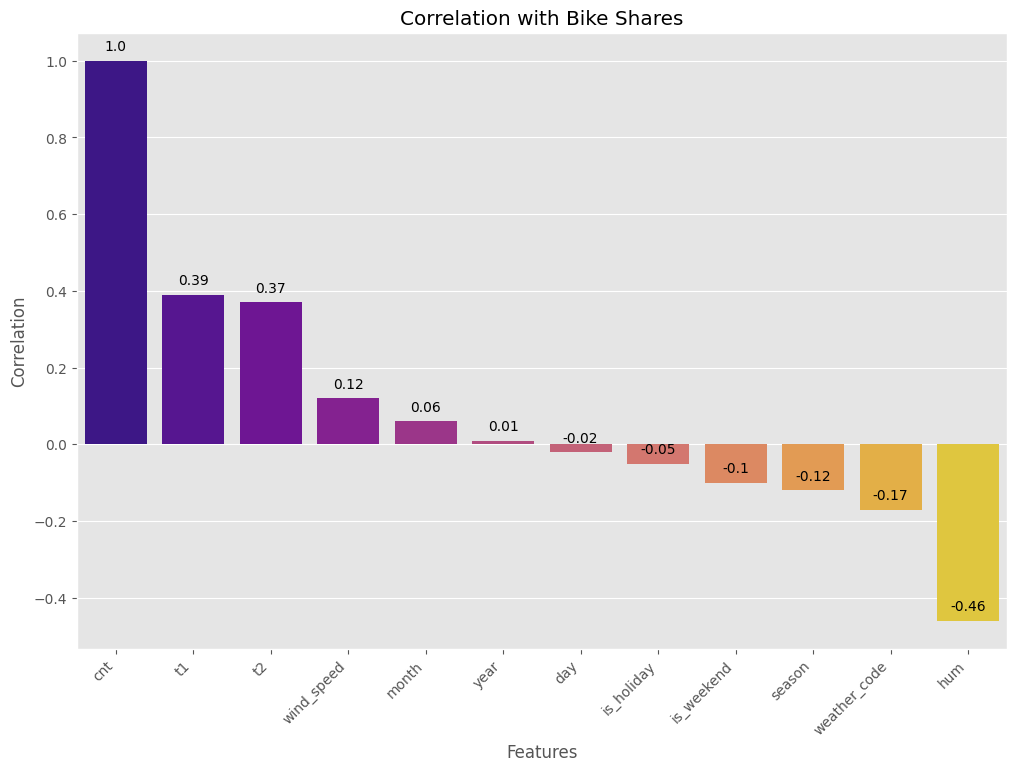

In [46]:
correlation_matrix = round(df.select_dtypes("number").corr(), 2)

correlation_with_cnt = correlation_matrix['cnt'].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=correlation_with_cnt.index, y=correlation_with_cnt.values, palette='plasma')
plt.title('Correlation with Bike Shares')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

<a id="7."></a> 
# Bike Shares Over Time

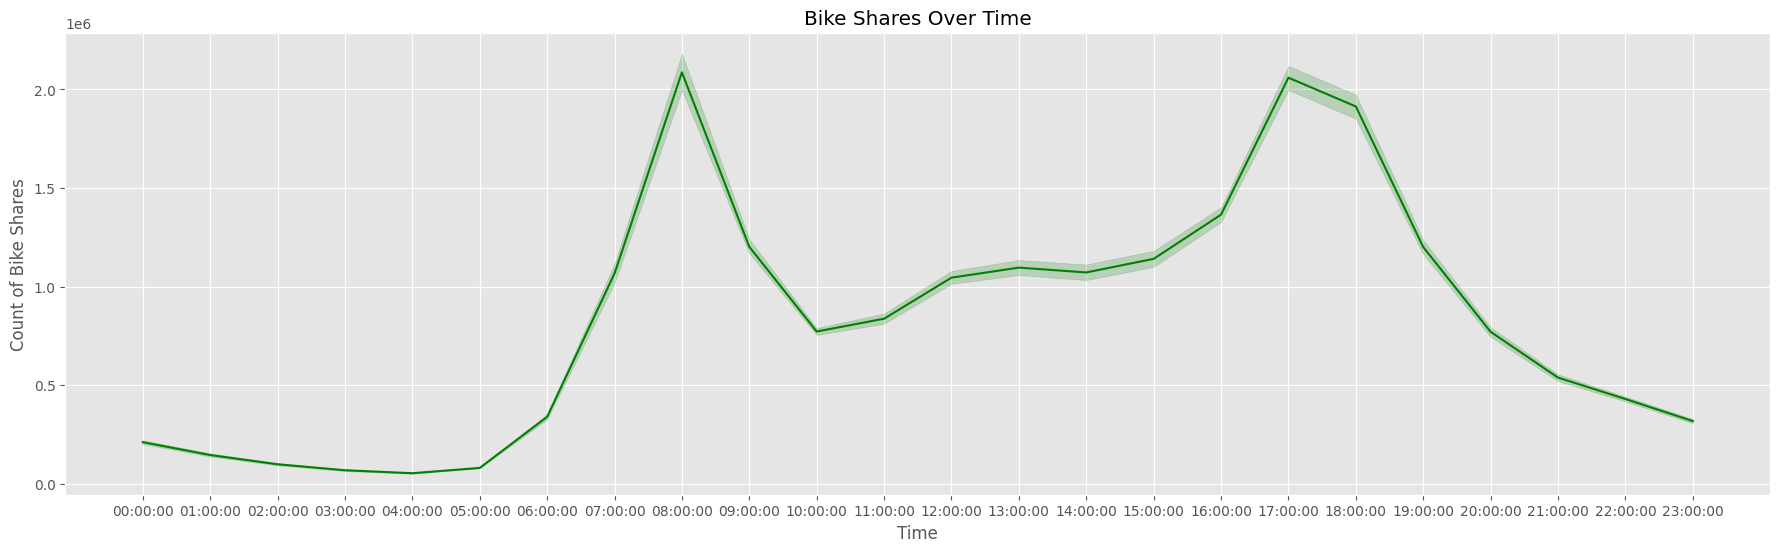

In [47]:
plt.figure(figsize=(22, 6))
sns.lineplot(x=df.time.astype(str), y='cnt', data=df, color='green', markers=True, estimator=sum)
plt.title('Bike Shares Over Time')
plt.xlabel('Time')
plt.ylabel('Count of Bike Shares')
plt.tight_layout
plt.show()

<a id="8."></a> 
# Bike Shares Over Year, Season, Month and Day

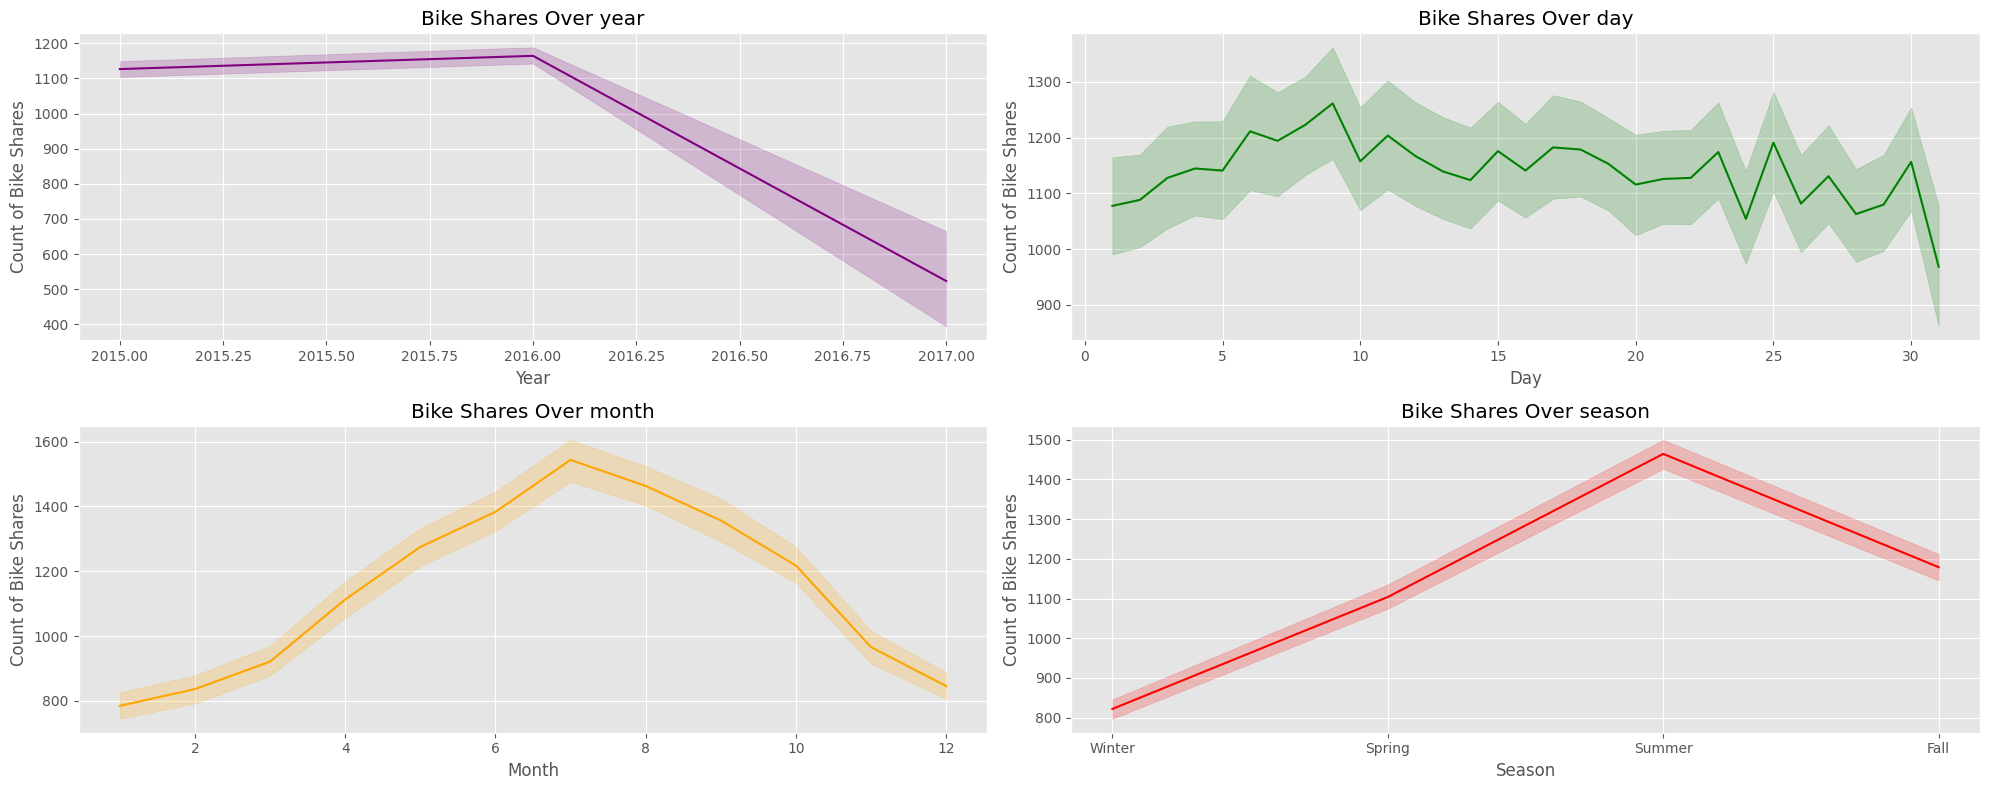

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
season_mapping = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}


sns.lineplot(x='year', y='cnt', data=df, color='purple', ax=axes[0][0])
axes[0][0].set_title('Bike Shares Over year')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Count of Bike Shares')
plt.style.use('ggplot')

sns.lineplot(x='month', y='cnt', data=df, color='orange', ax=axes[1][0])
axes[1][0].set_title('Bike Shares Over month')
axes[1][0].set_xlabel('Month')
axes[1][0].set_ylabel('Count of Bike Shares')


sns.lineplot(x='day', y='cnt', data=df, color='green', ax=axes[0][1])
axes[0][1].set_title('Bike Shares Over day')
axes[0][1].set_xlabel('Day')
axes[0][1].set_ylabel('Count of Bike Shares')


sns.lineplot(x=df['season'].map(season_mapping), y='cnt', data=df, color='red', ax=axes[1][1])
axes[1][1].set_title('Bike Shares Over season')
axes[1][1].set_xlabel('Season')
axes[1][1].set_ylabel('Count of Bike Shares')

plt.tight_layout()
plt.show()

<a id="9."></a> 
# Bike Shares by months and year_of_month

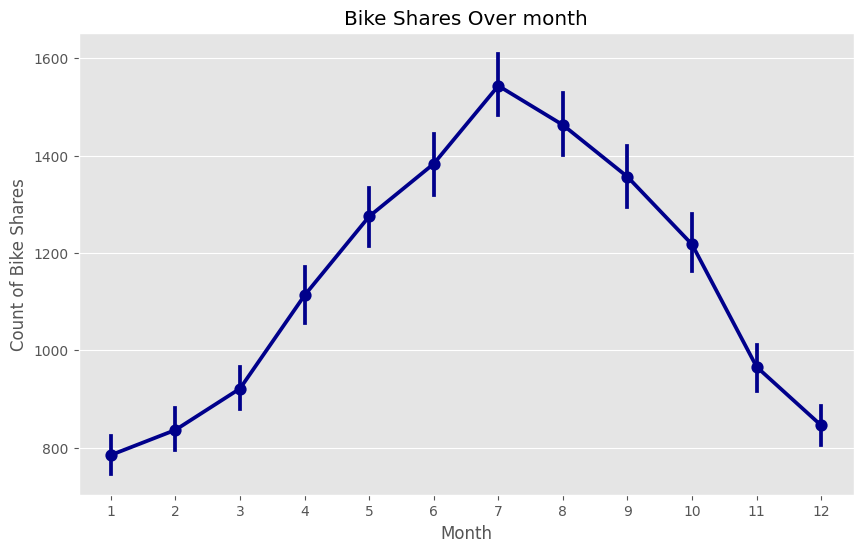

In [49]:
plt.figure(figsize=(10, 6))
sns.pointplot(x="month", y='cnt', data=df, color="darkblue")
plt.title('Bike Shares Over month')
plt.xlabel('Month')
plt.ylabel('Count of Bike Shares')
plt.show()

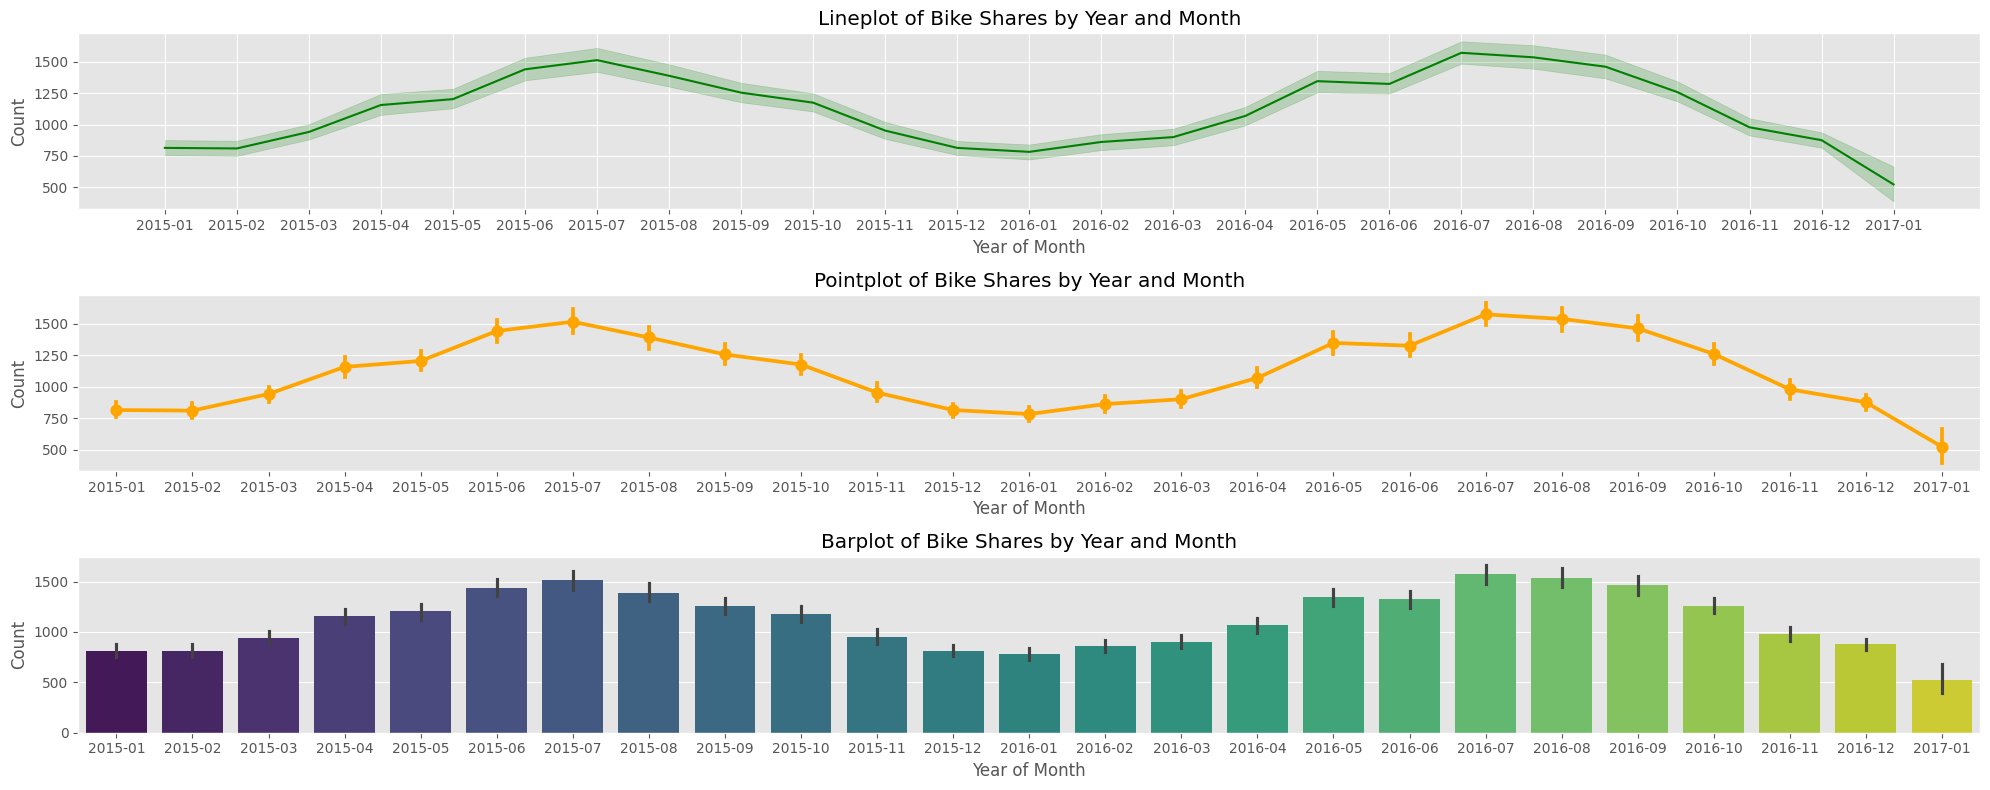

In [50]:
df['year_of_month'] = df.index.to_period('M').astype(str)

# Plotting using Seaborn
plt.figure(figsize=(20, 8))

# Lineplot
plt.subplot(3, 1, 1)
sns.lineplot(data=df, x='year_of_month', y='cnt', color="green")
plt.title('Lineplot of Bike Shares by Year and Month')

plt.xlabel('Year of Month')
plt.ylabel('Count')

# Pointplot
plt.subplot(3, 1, 2)
sns.pointplot(data=df, x='year_of_month', y='cnt', color="orange")
plt.title('Pointplot of Bike Shares by Year and Month')

plt.xlabel('Year of Month')
plt.ylabel('Count')

# Barplot
plt.subplot(3, 1, 3)
sns.barplot(data=df, x='year_of_month', y='cnt', palette="viridis")
plt.title('Barplot of Bike Shares by Year and Month')

plt.xlabel('Year of Month')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

<a id="10."></a> 
# Bike Shares by hours on (holidays, weekend, season)

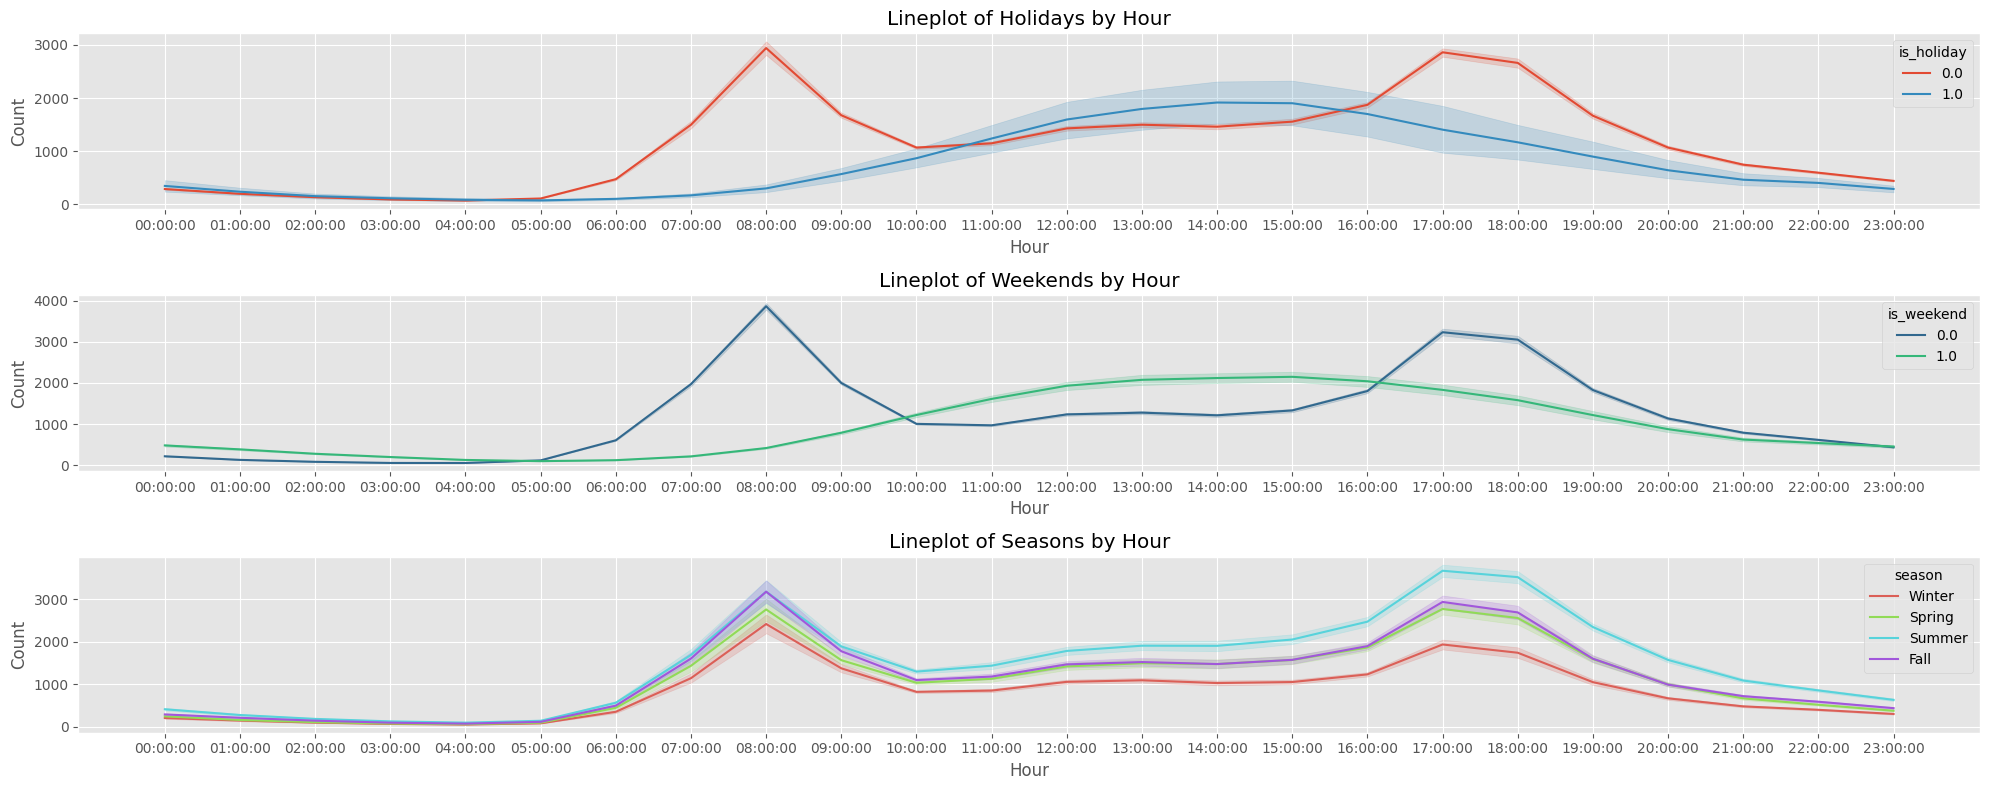

In [51]:
# Plotting using Seaborn
plt.figure(figsize=(20, 8))
season_mapping = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}

# Lineplot
plt.subplot(3, 1, 1)
sns.lineplot(y=df.cnt, x=df.time.astype(str), color="red", hue=df.is_holiday)
plt.title('Lineplot of Holidays by Hour')

plt.xlabel('Hour')
plt.ylabel('Count')

# Pointplot
plt.subplot(3, 1, 2)
sns.lineplot(y=df.cnt, x=df.time.astype(str), hue=df.is_weekend, palette="viridis")
plt.title('Lineplot of Weekends by Hour')

plt.xlabel('Hour')
plt.ylabel('Count')

# Barplot
plt.subplot(3, 1, 3)
sns.lineplot(y=df.cnt, x=df.time.astype(str), palette="hls", hue=df['season'].map(season_mapping))
plt.title('Lineplot of Seasons by Hour')

plt.xlabel('Hour')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

<a id="11."></a> 
# Bike Shares by day of week

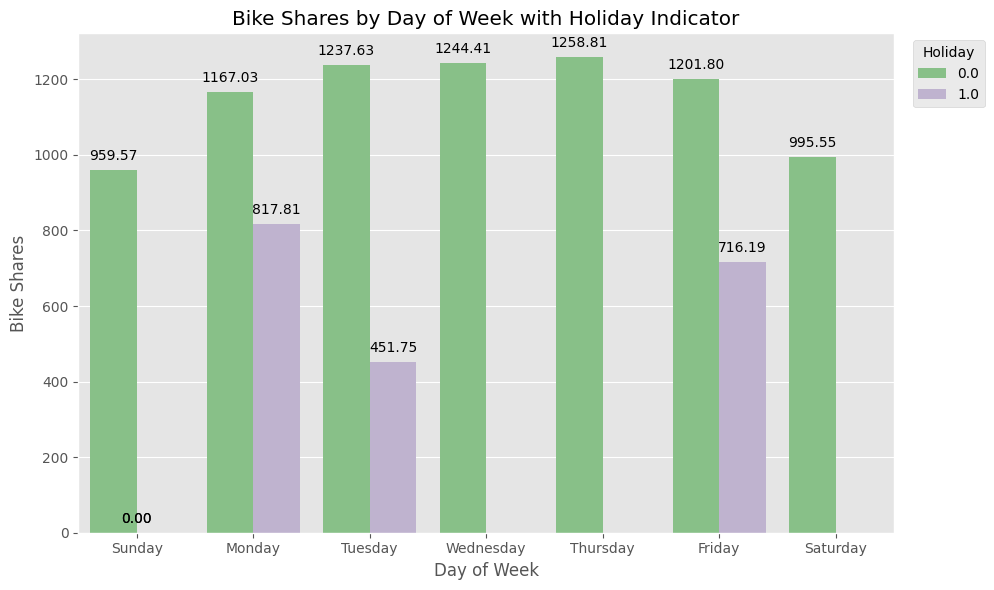

In [52]:
df['day_of_week'] = df.index.day_name()

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=df, x='day_of_week', y=df.cnt, hue='is_holiday', ci=None, palette="Accent")
plt.title('Bike Shares by Day of Week with Holiday Indicator')
plt.xlabel('Day of Week')
plt.ylabel('Bike Shares')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.legend(bbox_to_anchor=(0.62, 0.5, 0.5, 0.5), title='Holiday')
plt.tight_layout()
plt.show()

<a id="12."></a> 
# Bike Shares by day of month

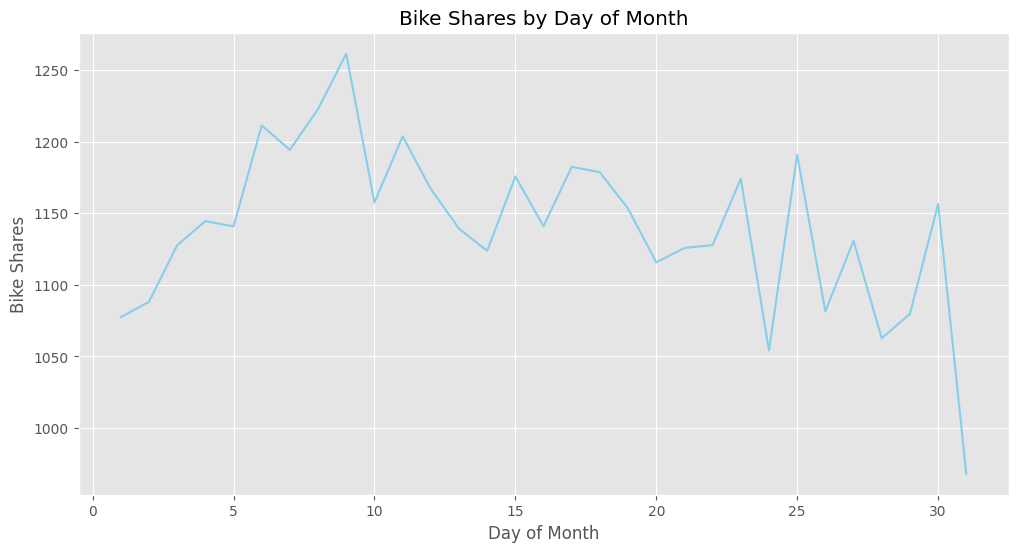

In [53]:
df['day_of_month'] = df.index.day

plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='day_of_month', y='cnt', ci=None, color='skyblue', markers=True)
plt.title('Bike Shares by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Bike Shares')

plt.show()

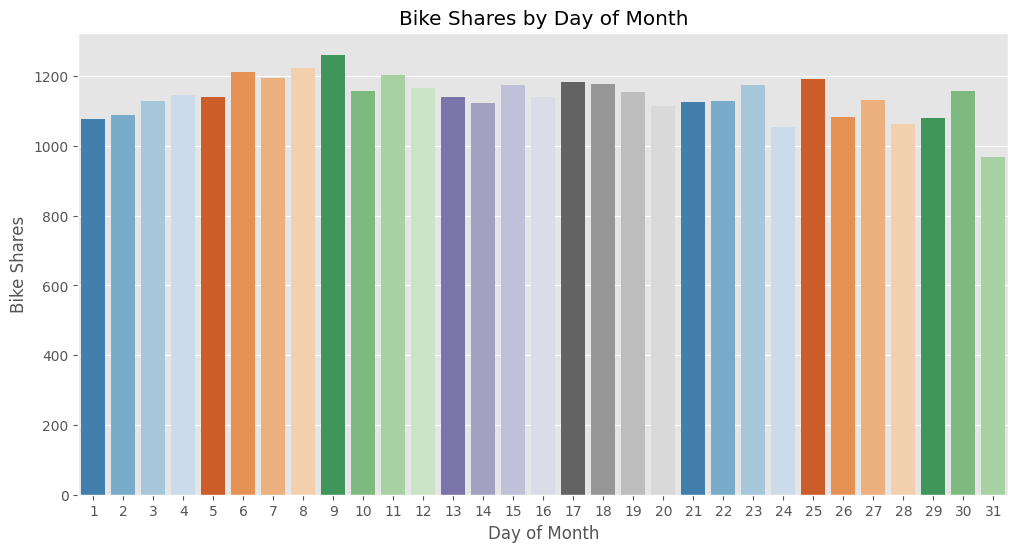

In [54]:
df['day_of_month'] = df.index.day

plt.figure(figsize=(12, 6))

sns.barplot(data=df, x='day_of_month', y='cnt', ci=None, palette="tab20c")
plt.title('Bike Shares by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Bike Shares')

plt.show()

<a id="13."></a> 
# Bike Shares by year

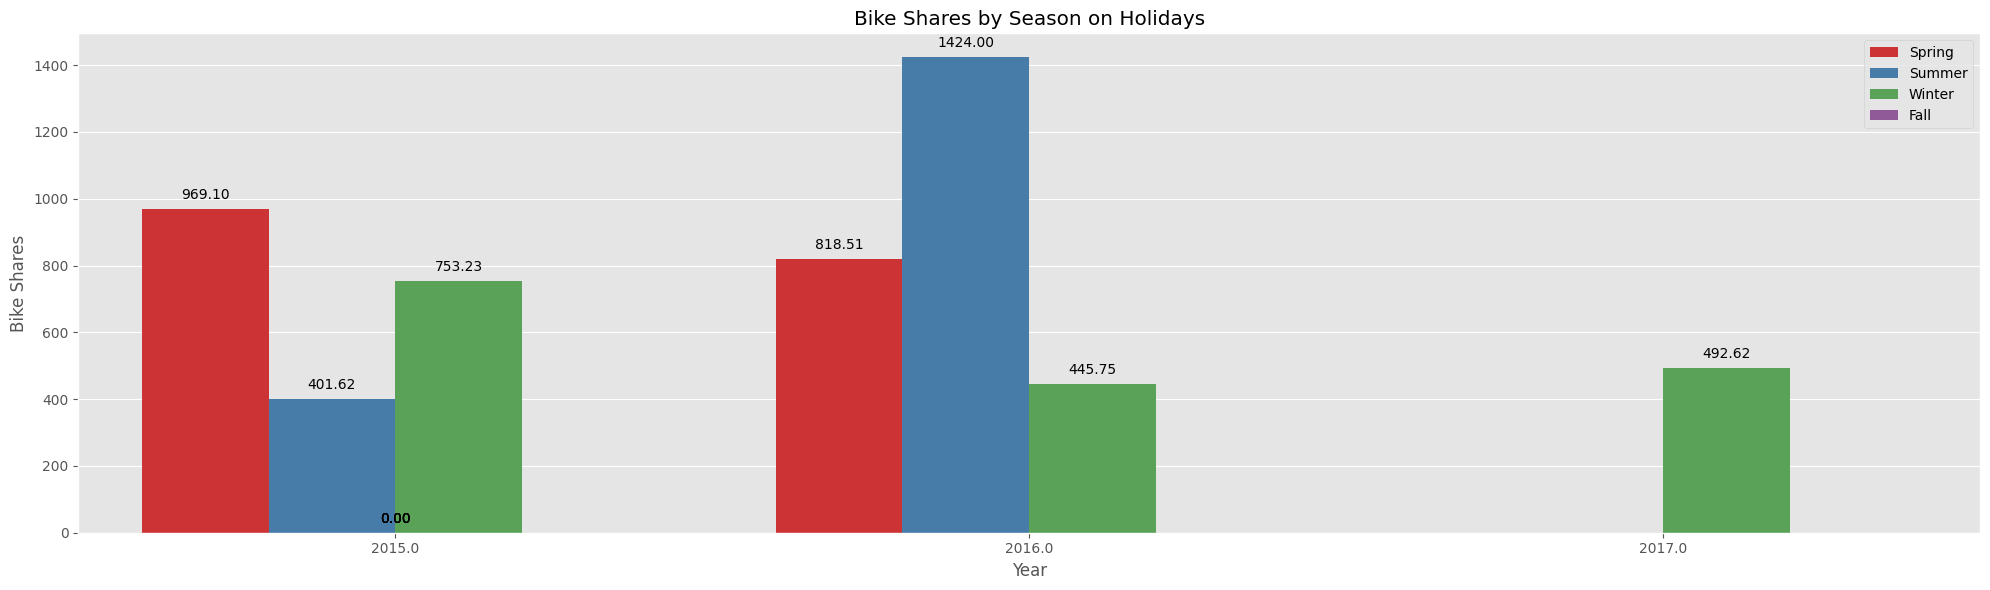

In [55]:
season_mapping = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}

plt.figure(figsize=(20, 6))

ax = sns.barplot(x='year', y="cnt", hue= df['season'].map(season_mapping) , data=df[df['is_holiday'] == 1], ci=None, palette="Set1")
plt.title('Bike Shares by Season on Holidays')
plt.xlabel('Year')
plt.ylabel('Bike Shares')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.tight_layout()
plt.legend()
plt.show()

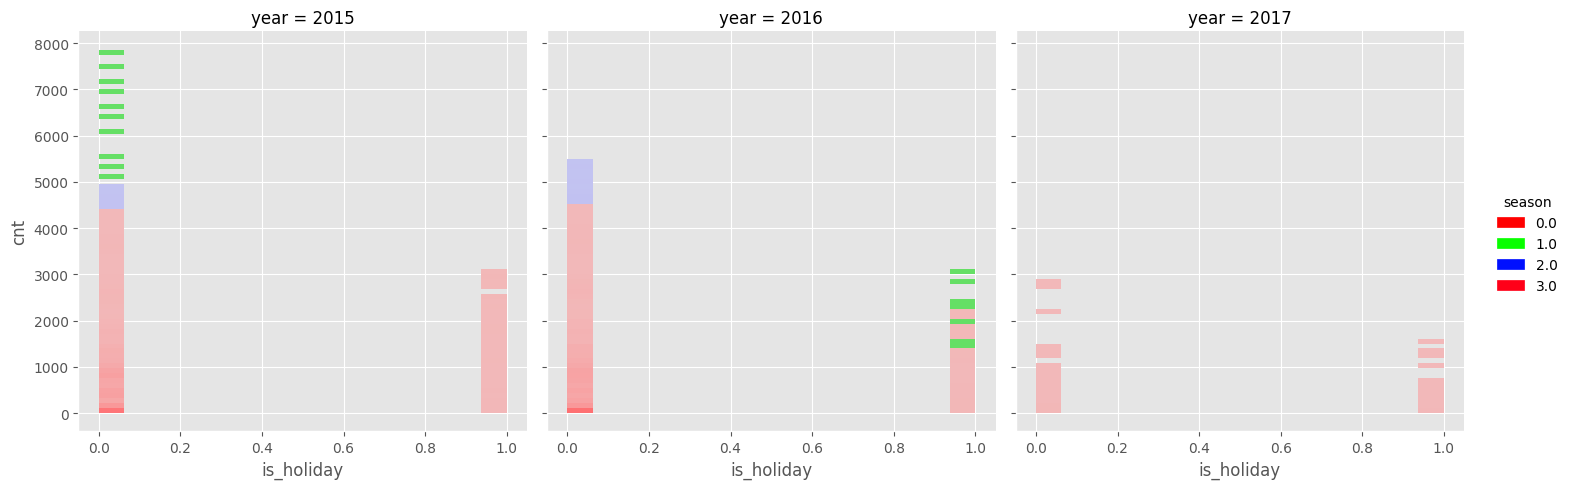

In [56]:
# Additional Graph

sns.displot(data=df, x='is_holiday', y='cnt', hue='season', palette='hsv', col="year");

<a id="14."></a> 
# Distribution of Bike Shares by weekday/weekend

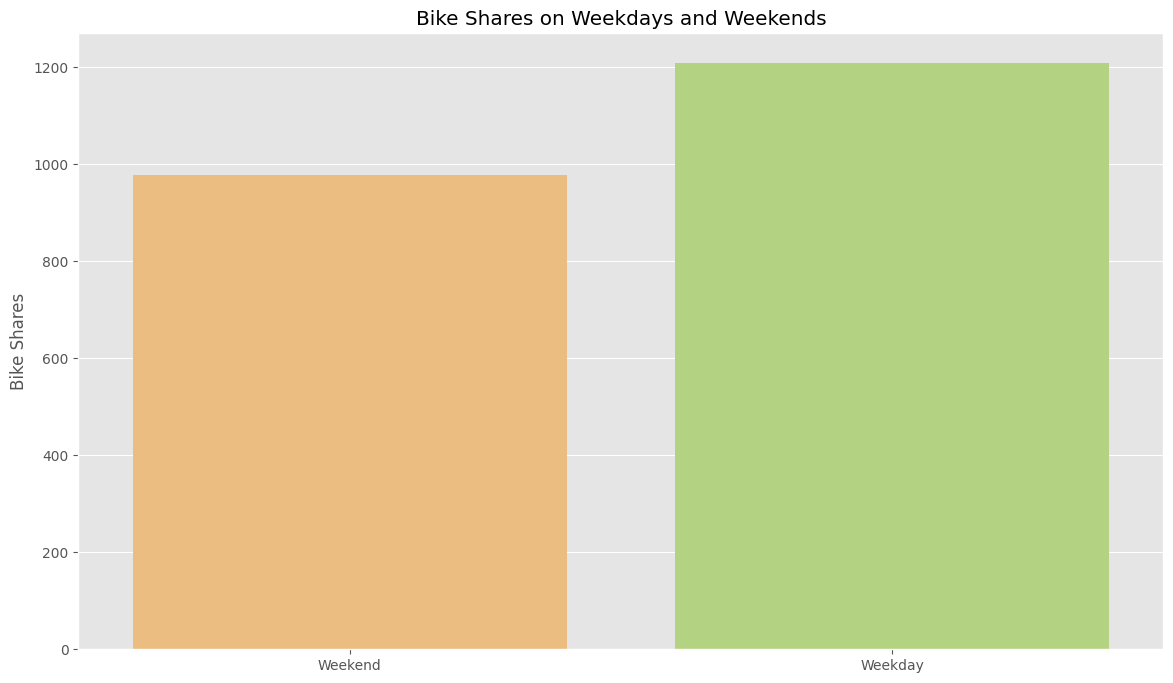

In [57]:
weekend_mapping = {0: 'Weekday', 1: 'Weekend'}
plt.figure(figsize=(14, 8))
sns.barplot(x=df['is_weekend'].map(weekend_mapping), y='cnt', ci=None, data=df, palette="RdYlGn")
plt.title('Bike Shares on Weekdays and Weekends')
plt.xlabel('')
plt.ylabel('Bike Shares')
plt.show()

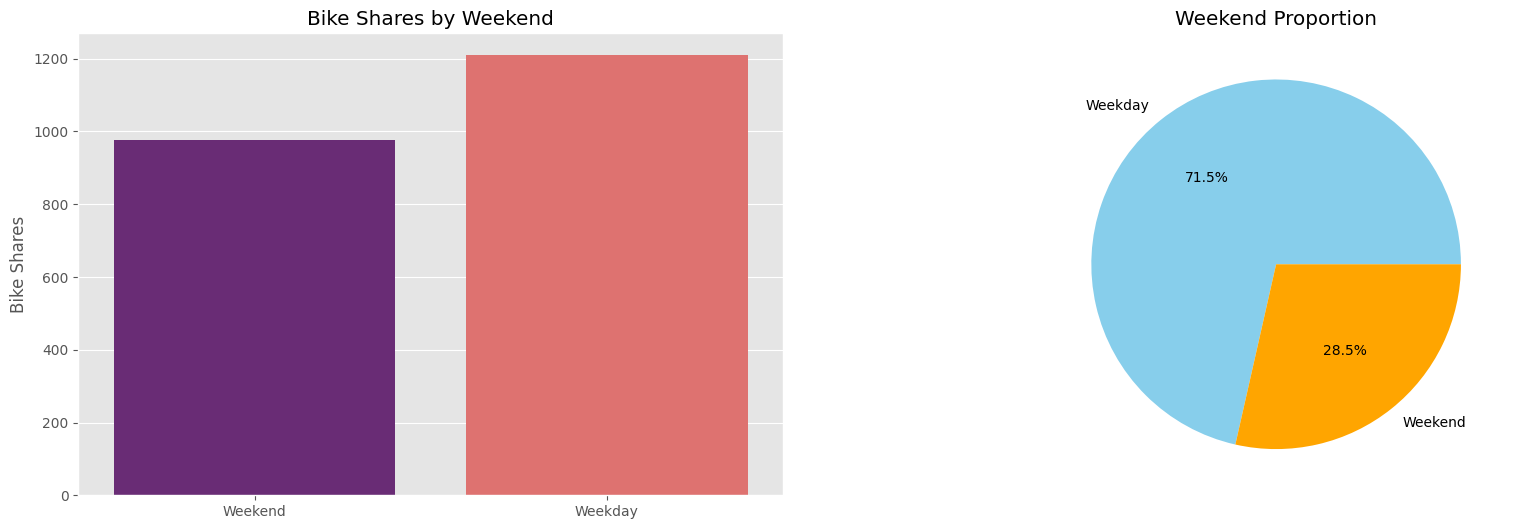

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

weekend_mapping = {0: 'Weekday', 1: 'Weekend'}

sns.barplot(x=df['is_weekend'].map(weekend_mapping), y='cnt', ci=None, data=df, palette='magma', ax=ax[0])
ax[0].set_title('Bike Shares by Weekend')
ax[0].set_xlabel("")
ax[0].set_ylabel("Bike Shares")

weekend_counts = df['is_weekend'].value_counts()
ax[1].pie(weekend_counts, labels=[weekend_mapping[key] for key in weekend_counts.index], autopct='%1.1f%%', colors=['skyblue', 'orange'])
ax[1].set_title('Weekend Proportion')
plt.show()

<a id="15."></a> 
# Distribution of Weather by Seasons

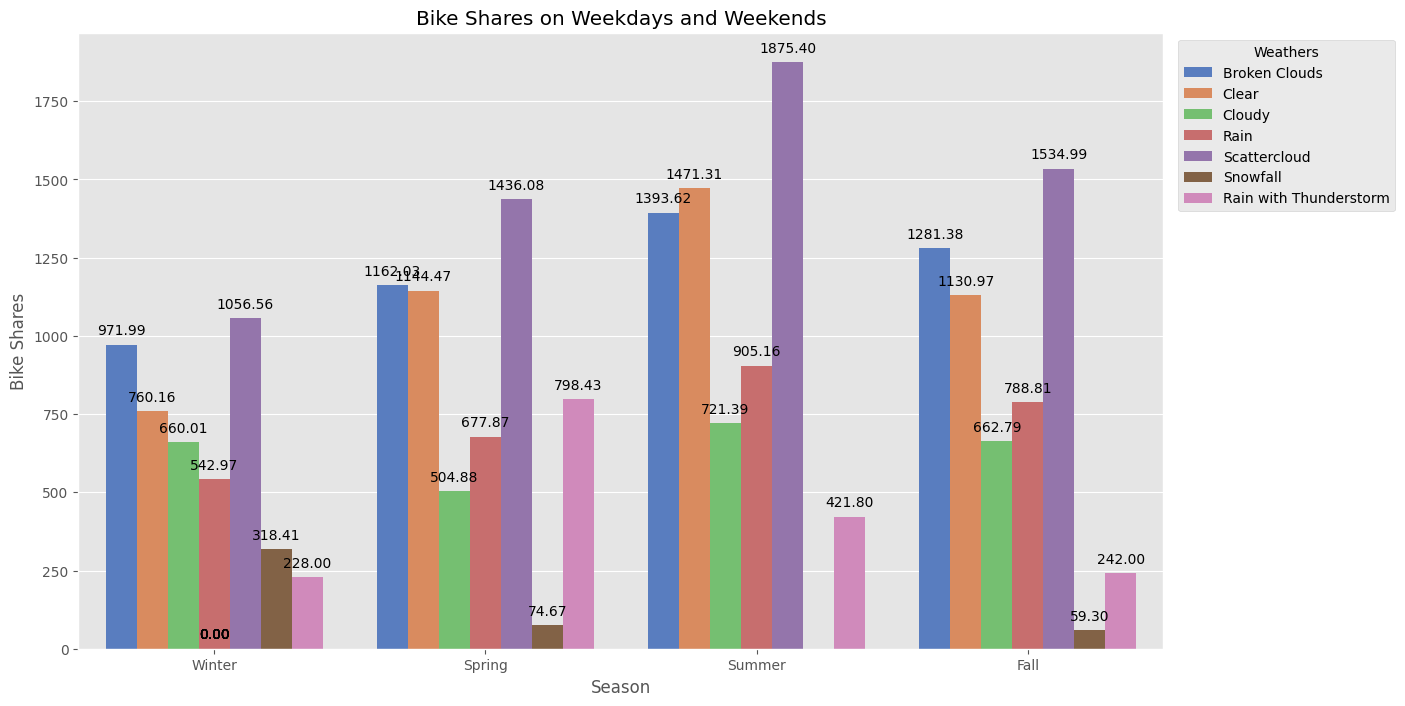

In [59]:
weather_mapping = {1: 'Clear', 2: 'Scattercloud', 3: "Broken Clouds", 4: "Cloudy", 7: "Rain", 10: "Rain with Thunderstorm", 26: "Snowfall", 94: "Freezing Fog"}
season_mapping = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=df['season'].map(season_mapping), data=df, palette="muted", y="cnt", hue=df['weather_code'].map(weather_mapping), ci=None)
plt.title('Bike Shares on Weekdays and Weekends')
plt.xlabel('Season')
plt.ylabel('Bike Shares')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(bbox_to_anchor = (0.72, 0.5, 0.5, 0.5), title= 'Weathers')
plt.show()

<a id="16."></a> 
# Conclusion

In this study, descriptive statistical analyses were conducted on the shared bike dataset. In the project, a general framework of the dataset was drawn using different visualization tools.

**And these are my conclusions from this project:**

1- There is a 39 percent positive correlation between bike usage and air temperature and a 46 percent negative correlation between bike usage and humidity.

<u>Reference:</u> [Correlation of the Target Variable and the other Features](#6.)

2 - Bike usage is highest between 7am and 5-6pm. This means that people in London are more likely to cycle in rush hours.

<u>Reference:</u> [Bike Shares Over Time](#7.)

3 - Bike usage was high from 2015 to 2016, but started to fall in the first quarter of 2016. The exact reason for this is not clear from this data, but we can speculate that it may be due to the bike rental policy or the increase in the usega of scooters.

<u>Reference:</u> [Bike Shares Over Year](#8.)

4 - If we look at bike usage by month and season, it is clear that people prefer better weather conditions. While usage is very low in fall and winter, usage is highest in spring and summer.

<u>Reference:</u> [Bike Shares Over Season and Month](#8.), [Bike Shares by months and year_of_month](#9.)

5 - As I said above, bike usage is highest during rush hours. However, if you look at the same graph for holidays and weekends, it is clear that bike usage is much lower on holidays and weekends. This shows that going to work and coming back is the biggest reason for people to rent a bike.

<u>Reference:</u> [Bike Shares by hours on holidays and weekends)](#10.), [Distribution of Bike Shares by weekday/weekend](#14.)

6 - If we look at the hour graph by season, we can see that bike usage is almost always the same in all seasons. Of course, usage is higher in summer than in winter, but the rates are the same in all seasons. This means that people rent bikes to get to work and back, regardless of the season.

<u>Reference:</u> [Bike Shares by hours on seasons](#10.)

7 - Regardless of the season, bike usage is highest in all seasons when the weather conditions are partly cloudy, overcast and clear. Other weather conditions are worse and therefore usage is lower.

<u>Reference:</u> [Distribution of Weather by Seasons](#15.)